Found 11 classes:
['articulated_truck', 'background', 'bicycle', 'bus', 'car', 'motorcycle', 'non-motorized_vehicle', 'pedestrian', 'pickup_truck', 'single_unit_truck', 'work_van']

--- Image Count per Class ---
- articulated_truck: 4991 images
- background: 7296 images
- bicycle: 2284 images
- bus: 5102 images
- car: 6268 images
- motorcycle: 1982 images
- non-motorized_vehicle: 1751 images
- pedestrian: 6262 images
- pickup_truck: 6290 images
- single_unit_truck: 5120 images
- work_van: 5455 images

--- Displaying Random Sample Images ---


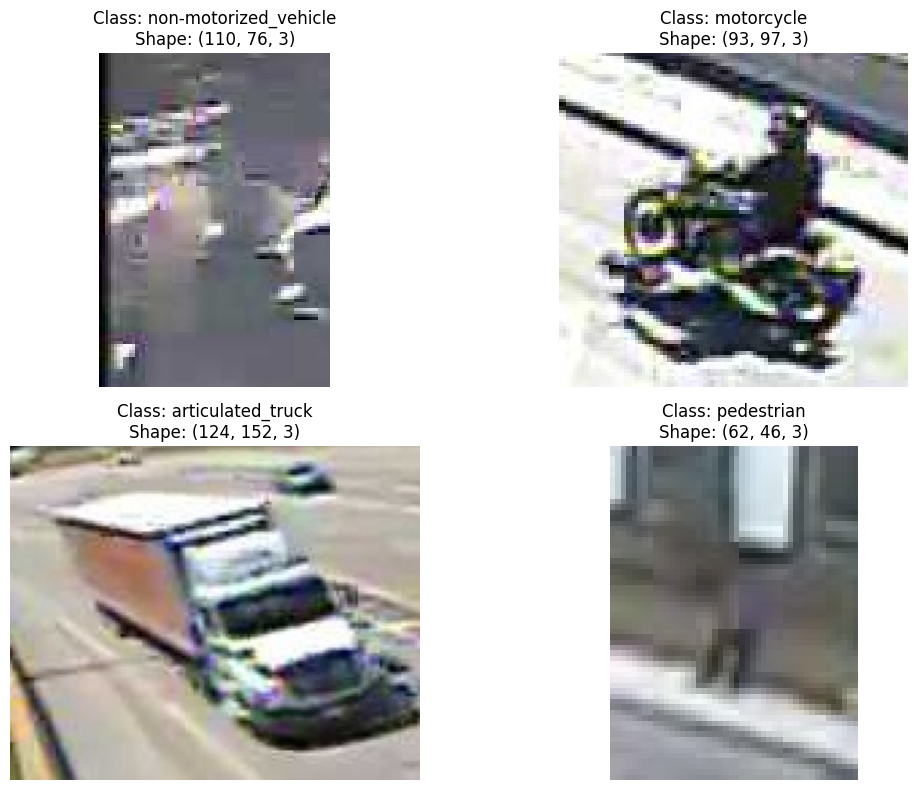

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

#path to dataset
dataset_path = r'D:\sem 5\DL\Project\dataset\archive\train1'

#list of vehicle classes and count images
if not os.path.exists(dataset_path):
    print(f"Error: The path '{dataset_path}' does not exist.")
    print("Please make sure you have downloaded the dataset and updated the 'dataset_path' variable.")
else:
    class_names = sorted(os.listdir(dataset_path))
    print(f"Found {len(class_names)} classes:")
    print(class_names)
    
    print("\n--- Image Count per Class ---")
    image_counts = {}
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            image_counts[class_name] = num_images
            print(f"- {class_name}: {num_images} images")

    #visualize a few random images
    print("\n--- Displaying Random Sample Images ---")
    sample_classes = random.sample(class_names, k=min(4, len(class_names)))
    
    plt.figure(figsize=(12, 8))
    
    for i, class_name in enumerate(sample_classes):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)
            if image_files:
                #random image from the class folder
                random_image_file = random.choice(image_files)
                image_path = os.path.join(class_path, random_image_file)
                
                # Read the image using OpenCV
                # OpenCV reads images in BGR format, so we convert to RGB for Matplotlib
                image = cv2.imread(image_path)
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # Display the image
                plt.subplot(2, 2, i + 1)
                plt.imshow(image_rgb)
                plt.title(f"Class: {class_name}\nShape: {image.shape}")
                plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import tensorflow as tf


IMG_SIZE = (128, 128)
BATCH_SIZE = 16
VALIDATION_SPLIT = 0.2 #20% of the data for validation

# create training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=123, # using a seed ensures the split is the same every time
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# create validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# verify
class_names = train_dataset.class_names
print("\n--- Verification ---")
print(f"Class names found by TensorFlow: {class_names}")

#shape of one batch of data
for images, labels in train_dataset.take(1):
    print(f"\nShape of one batch of images: {images.shape}")
    print(f"Shape of one batch of labels: {labels.shape}")
    print(f"Example label for the first image in the batch: {labels.numpy()} (corresponds to '{class_names[labels[0].numpy()]}')")


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

Found 52801 files belonging to 11 classes.
Using 42241 files for training.
Found 52801 files belonging to 11 classes.
Using 10560 files for validation.

--- Verification ---
Class names found by TensorFlow: ['articulated_truck', 'background', 'bicycle', 'bus', 'car', 'motorcycle', 'non-motorized_vehicle', 'pedestrian', 'pickup_truck', 'single_unit_truck', 'work_van']

Shape of one batch of images: (16, 128, 128, 3)
Shape of one batch of labels: (16,)
Example label for the first image in the batch: [6 7 8 1 4 8 0 9 3 3 0 3 9 7 4 7] (corresponds to 'non-motorized_vehicle')


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# get class names from training dataset
class_names = train_dataset.class_names 
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")

# Define image size and batch size for model
IMG_SIZE = 128
BATCH_SIZE = 16 

# model building
model = tf.keras.Sequential([
    # Input layer: Rescale pixel values from [0, 255] to [0, 1]
    layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the 3D feature maps into a 1D vector
    layers.Flatten(),

    # A dense (fully-connected) layer
    layers.Dense(128, activation='relu'),
    
    # Dropout layer to prevent overfitting
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(num_classes)
])

# compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()


In [4]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

print("\nDatasets are now optimized for training performance.")


Datasets are now optimized for training performance.


In [ ]:
# model training
EPOCHS = 10  # 10 full passes over the dataset

print("\nStarting model training...")

history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=EPOCHS
)

print("\nTraining finished!")


In [ ]:
# saving trained model
print("\nSaving the model...")

# defing path and name
model_save_path = r"D:\sem 5\DL\Project\dataset\archive\model\basic1.keras"
model.save(model_save_path)

print(f"Model saved to {model_save_path}")

In [ ]:
import matplotlib.pyplot as plt

#history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS) 

#Training and Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#Training and Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras import layers

# --- 1. Define the Data Augmentation Layers ---
# We'll use the layers your blueprint suggests 
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ],
  name="data_augmentation"
)

# --- 2. Define the NEW Model ---
# It's the same architecture as before, but with the augmentation
# layers added right at the beginning.

IMG_SIZE = 128
num_classes = len(class_names) # Should be 11

model_with_aug = tf.keras.Sequential([
    # Input layer
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    
    # Add the augmentation layers
    data_augmentation,
    
    # Rescale pixel values
    layers.Rescaling(1./255),

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the 3D feature maps into a 1D vector
    layers.Flatten(),

    # A dense (fully-connected) layer
    layers.Dense(128, activation='relu'),
    
    # Dropout layer to prevent overfitting [cite: 224]
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(num_classes)
])

# --- 3. Compile the New Model ---
model_with_aug.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# --- 4. Show the New Model Summary ---
model_with_aug.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)       │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289,099 (16.36 MB)

 Trainable params: 4,289,099 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# --- Train the NEW Model ---
EPOCHS = 30  # We'll train for longer this time

print("\nStarting model training with data augmentation...")

# Note: We are using 'model_with_aug' here
history_with_aug = model_with_aug.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=EPOCHS
)

print("\nTraining finished!")


Starting model training with data augmentation...
Epoch 1/30
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1251s 471ms/step - accuracy: 0.3666 - loss: 1.7634 - val_accuracy: 0.5697 - val_loss: 1.2650
Epoch 2/30
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 965s 365ms/step - accuracy: 0.4891 - loss: 1.4307 - val_accuracy: 0.5993 - val_loss: 1.1520
Epoch 3/30
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 982s 372ms/step - accuracy: 0.5508 - loss: 1.2655 - val_accuracy: 0.6754 - val_loss: 0.9414
Epoch 4/30
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 967s 366ms/step - accuracy: 0.5922 - loss: 1.1619 - val_accuracy: 0.7001 - val_loss: 0.8460
Epoch 5/30
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 970s 367ms/step - accuracy: 0.6154 - loss: 1.0960 - val_accuracy: 0.7061 - val_loss: 0.8345
Epoch 6/30
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 979s 371ms/step - accuracy: 0.6342 - loss: 1.0538 - val_accuracy: 0.7223 - val_loss: 0.8060
Epoch 7/30
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 963s 364ms/step - accuracy: 0.6481 - loss: 1.0110 - val_accuracy: 0.7426 - val_loss: 0.7460
Epoch 8/30

In [7]:
# --- Save the Trained Model ---

print("\nSaving the model...")

# Define a path and name for your model
model_save_path = r"D:\sem 5\DL\Project\dataset\archive\model\basic1_dataaugmented.keras"

# Save the model
model_with_aug.save(model_save_path)

print(f"Model saved to {model_save_path}")

# (Optional) If you prefer a single .h5 file:
# model.save("my_vehicle_classifier_model.h5")


Saving the model...
Model saved to D:\sem 5\DL\Project\dataset\archive\model\basic1_dataaugmented.keras


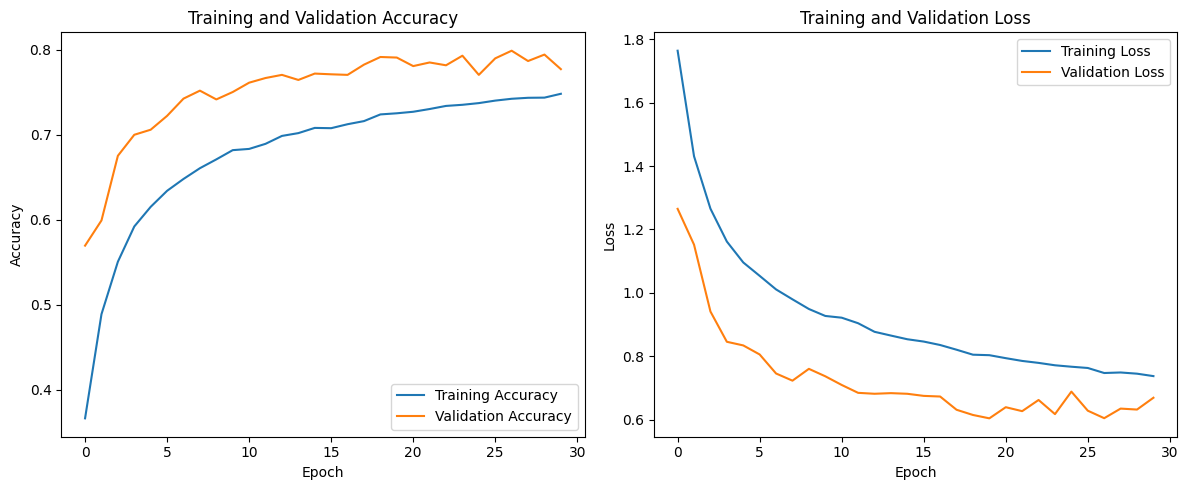

In [9]:
import matplotlib.pyplot as plt

# --- 1. Get the history from the correct variable ---
# FIX: Changed 'history' to 'history_with_aug'
acc = history_with_aug.history['accuracy']
val_acc = history_with_aug.history['val_accuracy']
loss = history_with_aug.history['loss']
val_loss = history_with_aug.history['val_loss']

# This is a more robust way to get the number of epochs that ran
epochs_range = range(len(acc)) 

# --- 2. Plot Training and Validation Accuracy ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# --- 3. Plot Training and Validation Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout() # Added this to prevent plots from overlapping
plt.show()

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

Loading model from D:\sem 5\DL\Project\dataset\archive\model\basic1_dataaugmented.keras...
Model loaded successfully!
Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step

--- Prediction Results ---
This image most likely belongs to: articulated_truck
Confidence: 88.92%


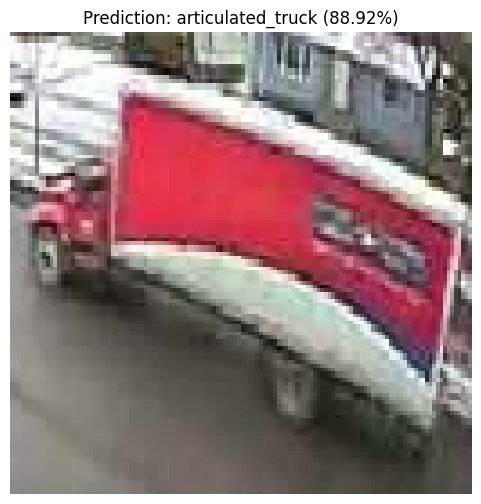

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# --- 1. DEFINE PARAMETERS (FILLED IN FROM YOUR CODE) ---

# Path to your saved model (from your script)
model_load_path = r"D:\sem 5\DL\Project\dataset\archive\model\basic1_dataaugmented.keras"

# The image dimensions your model was trained on (from your script)
IMG_HEIGHT = 128
IMG_WIDTH = 128

# Your class names, in the order TensorFlow found them (from your script's output)
class_names = [
    'articulated_truck', 'background', 'bicycle', 'bus', 'car', 'motorcycle', 
    'non-motorized_vehicle', 'pedestrian', 'pickup_truck', 
    'single_unit_truck', 'work_van'
]

# --- 2. SET TEST IMAGE PATH (YOU MUST CHANGE THIS!) ---

# ⚠️ UPDATE THIS: Path to a new image you want to classify
test_image_path = r"D:\sem 5\DL\Project\dataset\archive\train1\single_unit_truck\00001421.jpg" 

# --- 3. LOAD THE SAVED MODEL ---
print(f"Loading model from {model_load_path}...")
try:
    # Load the model. This includes the Rescaling layer.
    model = tf.keras.models.load_model(model_load_path)
    print("Model loaded successfully!")
    # model.summary() # Optional: Uncomment to see the loaded architecture
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# --- 4. LOAD AND PREPROCESS THE TEST IMAGE ---
try:
    # Load the image, resizing it to the target dimensions (128x128)
    img = load_img(test_image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))

    # Convert the image to a NumPy array (shape: (128, 128, 3))
    img_array = img_to_array(img)

    # *** IMPORTANT ***
    # We DO NOT divide by 255.0 here.
    # Why? Because your model includes 'layers.Rescaling(1./255)' as its first layer.
    # The model expects raw pixel values (0-255) as input.

    # Add a "batch" dimension to match the model's input shape
    # Shape changes from (128, 128, 3) to (1, 128, 128, 3)
    img_batch = np.expand_dims(img_array, 0) 

    # --- 5. MAKE A PREDICTION ---
    print("Making prediction...")
    
    # model.predict() returns 'logits' because your model used from_logits=True
    predictions = model.predict(img_batch)
    
    # We must apply the 'softmax' function to convert logits into probabilities
    score = tf.nn.softmax(predictions[0])

    # --- 6. INTERPRET THE RESULTS ---
    predicted_index = np.argmax(score)
    predicted_class = class_names[predicted_index]
    confidence = 100 * np.max(score)

    print(f"\n--- Prediction Results ---")
    print(f"This image most likely belongs to: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the image with its prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

except FileNotFoundError:
    print(f"\n--- ERROR ---")
    print(f"File not found at: {test_image_path}")
    print("Please update the 'test_image_path' variable to a valid image file.")
except Exception as e:
    print(f"An error occurred during prediction: {e}")